# **Data Preprocessing**

In [ ]:
## Block 1: Download data base

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2024-05-30 20:19:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.207, 173.194.193.207, 173.194.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  99.9MB/s    in 0.7s    

2024-05-30 20:19:03 (99.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
## Block 2: extract data to the directory
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
## Block 3: all of requirment imports
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
from os import listdir
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Conv1D,Conv2D, AveragePooling2D,SeparableConv2D, MaxPooling2D
from tensorflow.keras.layers import Lambda,DepthwiseConv2D,Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout , Multiply, Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv1D, Add, Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
import numpy as np

In [ ]:
### Block 4: load Validation data of Cat and Dog

q=[]

# get the path/directory
folder_dir = "/tmp/cats_and_dogs_filtered/validation/cats/"
for images in os.listdir(folder_dir):
    img_path = "/tmp/cats_and_dogs_filtered/validation/cats/"

    img = load_img(img_path+ images, target_size=(150, 150))  # this is a PIL image
    # print(img_path+ images)
    # imgplot = plt.imshow(img)
    x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
    x /= 255
    # print(type(x))
    # print(images)
    # print(x)
    # print(x.shape)
    # Rescale by 1/255
    q.append(x)

    # print(images)
    # check if the image ends with png
    if (images.endswith(".png")):
        print(images)

x_valid1 = np.array(q)
# print(type(x_valid1))
# print(x_valid1.shape)
y_valid1 = np.zeros((500,1))
# print(y_valid1.shape)
print('x_valid1 shape:', x_valid1.shape)
print('y_valid1 shape:', y_valid1.shape)


### dog train
qq=[]

# get the path/directory
folder_dir = "/tmp/cats_and_dogs_filtered/validation/dogs/"
for images in os.listdir(folder_dir):
    img_path = "/tmp/cats_and_dogs_filtered/validation/dogs/"
    # print(images)
    # print(img_path+ images)
    img = load_img(img_path+ images, target_size=(150, 150))  # this is a PIL image
    # print(img_path+ images)
    # imgplot = plt.imshow(img)
    x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
    x /= 255
    # print(type(x))
    # print(x)
    # print(x.shape)
    # Rescale by 1/255
    qq.append(x)


x_valid2 = np.array(qq)
# print(type(x_valid2))
# print(x_valid2.shape)
y_valid2 = np.ones((500,1))
# print(y_valid2.shape)
print('x_valid2 shape:', x_valid2.shape)
print('y_valid2 shape:', y_valid2.shape)


print('--------------')
x_valid = np.concatenate((x_valid1,x_valid2),axis=0)
y_valid = np.concatenate((y_valid1,y_valid2),axis=0)

x_valid , y_valid = shuffle(x_valid , y_valid , random_state=0)

print('x_valid shape:', x_valid.shape)
print('y_valid shape:', y_valid.shape)

x_valid1 shape: (500, 150, 150, 3)
y_valid1 shape: (500, 1)
x_valid2 shape: (500, 150, 150, 3)
y_valid2 shape: (500, 1)
--------------
x_valid shape: (1000, 150, 150, 3)
y_valid shape: (1000, 1)


In [ ]:
### Block 5: load Test data of Cat and Dog

q=[]

# get the path/directory
folder_dir = "/tmp/cats_and_dogs_filtered/train/cats/"
for images in os.listdir(folder_dir):
    img_path = "/tmp/cats_and_dogs_filtered/train/cats/"

    img = load_img(img_path+ images, target_size=(150, 150))  # this is a PIL image
    # print(img_path+ images)
    # imgplot = plt.imshow(img)
    x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
    x /= 255
    # print(type(x))
    # print(images)
    # print(x)
    # print(x.shape)
    # Rescale by 1/255
    q.append(x)

    # print(images)
    # check if the image ends with png
    if (images.endswith(".png")):
        print(images)

x_train1 = np.array(q)
# print(type(x_train1))
# print(x_train1.shape)
y_train1 = np.zeros((1000,1))
# print(y_train1.shape)
print('x_train1 shape:', x_train1.shape)
print('y_train1 shape:', y_train1.shape)

### dog train
qq=[]

# get the path/directory
folder_dir = "/tmp/cats_and_dogs_filtered/train/dogs/"
for images in os.listdir(folder_dir):
    img_path = "/tmp/cats_and_dogs_filtered/train/dogs/"

    img = load_img(img_path+ images, target_size=(150, 150))  # this is a PIL image
    # print(img_path+ images)
    # imgplot = plt.imshow(img)
    x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
    x /= 255
    # print(type(x))
    # print(images)
    # print(x)
    # print(x.shape)
    # Rescale by 1/255
    qq.append(x)


x_train2 = np.array(qq)
# print(type(x_train2))
# print(x_train2.shape)
y_train2 = np.ones((1000,1))
# print(y_train2.shape)
print('x_train2 shape:', x_train2.shape)
print('y_train2 shape:', y_train2.shape)

print('--------------')
x_train = np.concatenate((x_train1,x_train2),axis=0)
y_train = np.concatenate((y_train1,y_train2),axis=0)

x_train , y_train = shuffle(x_train , y_train , random_state=0)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train1 shape: (1000, 150, 150, 3)
y_train1 shape: (1000, 1)
x_train2 shape: (1000, 150, 150, 3)
y_train2 shape: (1000, 1)
--------------
x_train shape: (2000, 150, 150, 3)
y_train shape: (2000, 1)


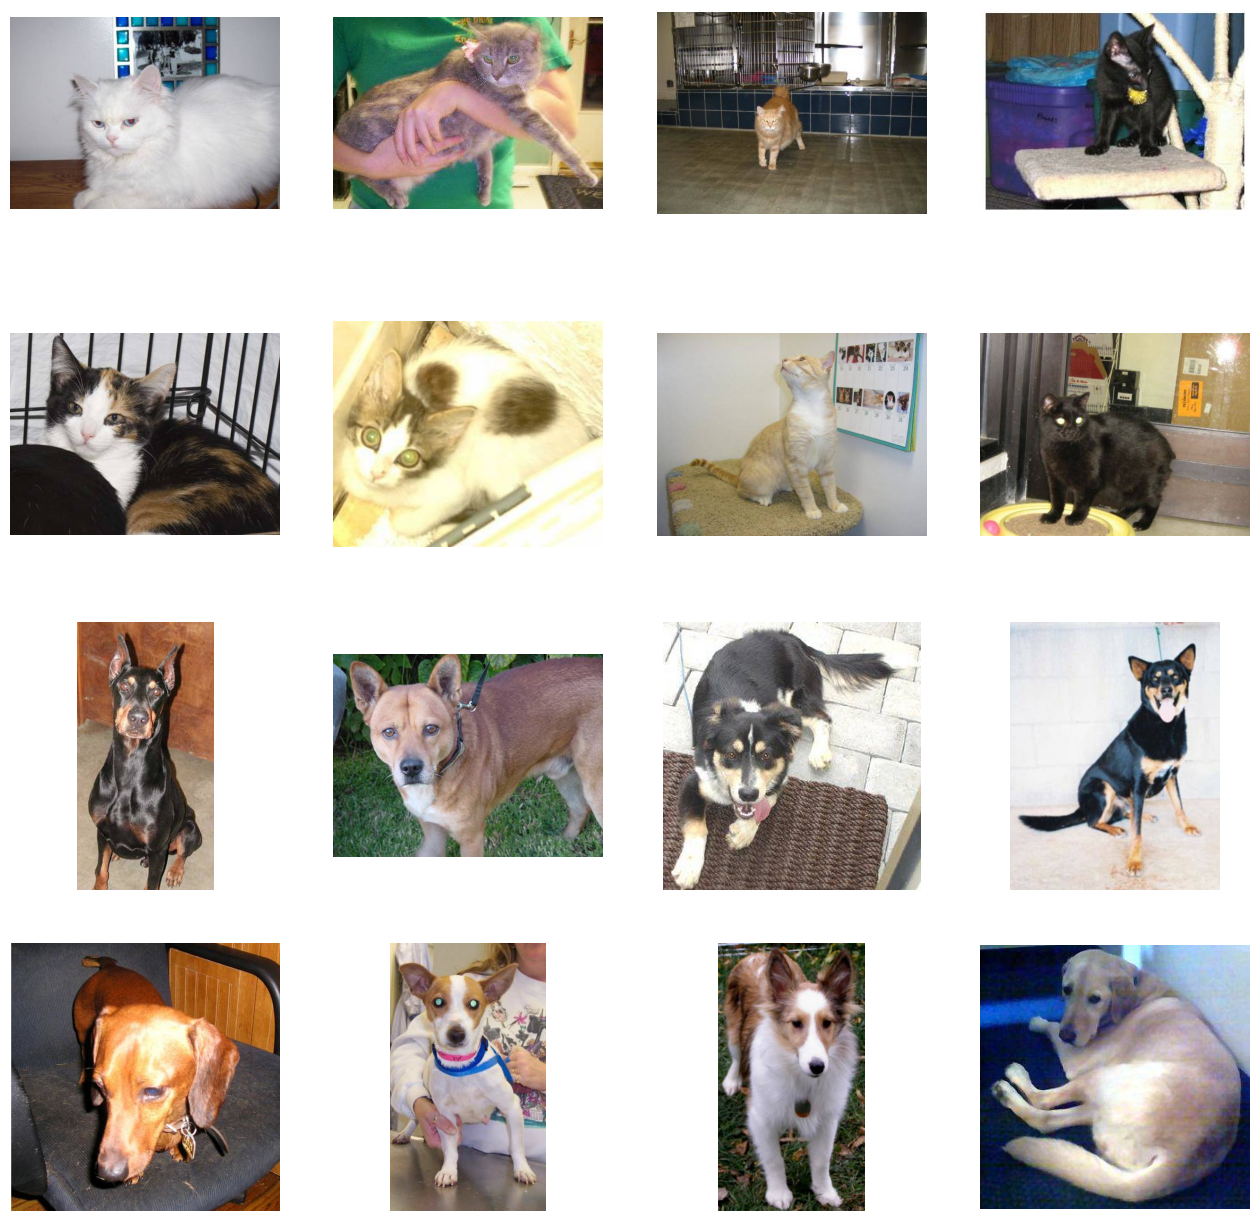

In [ ]:
### Block 6: show some of training and validation data

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

####
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)

####
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Designing, training and testing the desired model**

In [ ]:
### Block 7: Define the best and desired model

def getmodel():
    img_input = Input(shape=(150, 150, 3))
    x = Conv2D(16, 3 )(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = MaxPooling2D(2)(x)
    x = Conv2D(32, 3 )(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = MaxPooling2D(2)(x)
    x = Conv2D(64, 3 )(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = MaxPooling2D(2)(x)
    # Flatten feature map to a 1-dim tensor so we can add fully connected layers
    x = Flatten()(x)
    # Create a fully connected layer with ReLU activation and 512 hidden units
    x = Dense(512, activation='relu')(x)
    # Create output layer with a single node and sigmoid activation
    output = Dense(1, activation='sigmoid')(x)
    # Create model:
    from keras import optimizers
    model = Model(img_input, output)
    model.compile(loss='binary_crossentropy',
                optimizer= 'Adam' ,
                metrics=['acc'])
    return model

Epoch 1/30
100/100 - 4s - loss: 2.3475 - acc: 0.5780 - val_loss: 0.7472 - val_acc: 0.5180 - 4s/epoch - 45ms/step
Epoch 2/30
100/100 - 2s - loss: 0.8434 - acc: 0.6445 - val_loss: 1.4335 - val_acc: 0.5000 - 2s/epoch - 17ms/step
Epoch 3/30
100/100 - 2s - loss: 0.5627 - acc: 0.7305 - val_loss: 1.0775 - val_acc: 0.5080 - 2s/epoch - 16ms/step
Epoch 4/30
100/100 - 2s - loss: 0.5726 - acc: 0.7390 - val_loss: 1.4494 - val_acc: 0.5170 - 2s/epoch - 16ms/step
Epoch 5/30
100/100 - 2s - loss: 0.4147 - acc: 0.8165 - val_loss: 0.6433 - val_acc: 0.6760 - 2s/epoch - 23ms/step
Epoch 6/30
100/100 - 2s - loss: 0.3552 - acc: 0.8330 - val_loss: 0.6103 - val_acc: 0.7110 - 2s/epoch - 23ms/step
Epoch 7/30
100/100 - 2s - loss: 0.3069 - acc: 0.8670 - val_loss: 0.5876 - val_acc: 0.7260 - 2s/epoch - 16ms/step
Epoch 8/30
100/100 - 2s - loss: 0.2481 - acc: 0.8975 - val_loss: 1.0654 - val_acc: 0.6270 - 2s/epoch - 16ms/step
Epoch 9/30
100/100 - 2s - loss: 0.2384 - acc: 0.8920 - val_loss: 0.9084 - val_acc: 0.6880 - 2s/e

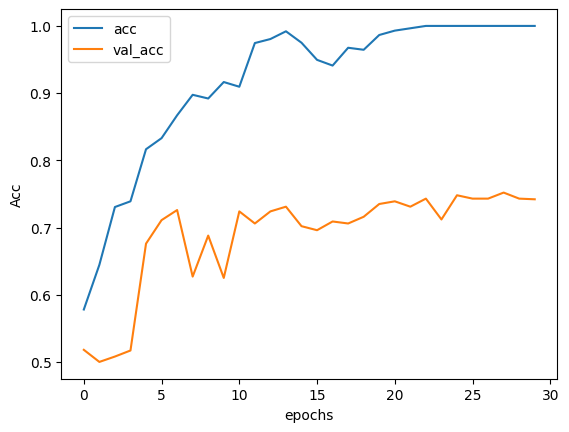

Evaluate validation accuracy: 0.7419999837875366
The request time of model: 0:00:00.002777
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_55 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_22 (Ba  (None, 148, 148, 16)      64        
 tchNormalization)                                               
                                                                 
 activation_22 (Activation)  (None, 148, 148, 16)      0         
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                 

In [ ]:
### Block 8: Training and testing desired model.
model = getmodel()
import datetime
start = datetime.datetime.now()

fittedModel = model.fit(x_train, y_train,
              batch_size= 20 ,
              epochs= 30,
              verbose=2,
              validation_data=(x_valid, y_valid))

end = datetime.datetime.now()
elaps = end - start
print('Total training time:', str(elaps))

#### ploting Accuracy of (test,train) for model
######
import matplotlib.pyplot as plt
b = fittedModel.history
val_acc = b['val_acc']
acc = b['acc']
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc', 'val_acc'])
plt.show()


start = datetime.datetime.now()
score, acc = model.evaluate(x_valid , y_valid, batch_size=1, verbose=0)
print('Evaluate validation accuracy:', acc)

end = datetime.datetime.now()
elaps = end - start
each = elaps / x_valid.shape[0]
print('The request time of model:' , str(each))

model.summary()
model.save('CatDogClassification.h5')

# **Calcluding the Scores of Desired Model**

Accuracy: 0.742000
Only number of true prediction: 742
Precision: 0.742000
Recall: 0.742000
F1 score: 0.742000
Cohens kappa: 0.484000
ROC AUC: 0.742000
FP: [134 124]
FN: [124 134]
TP: [376 366]
TN: [366 376]
scores for each class:
TPR: [0.752 0.732]
TNR: [0.732 0.752]
PPV: [0.7372549  0.74693878]
NPV: [0.74693878 0.7372549 ]
FPR: [0.268 0.248]
FNR: [0.248 0.268]
FDR: [0.2627451  0.25306122]
Accuracy for each class: [0.742 0.742]
1000/1000 [==============================] - 2s 2ms/step


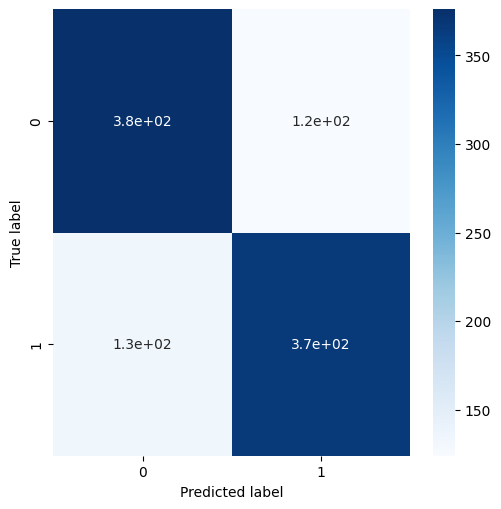

In [ ]:
## Block 9: getting different kinds of scores from best model.
#####
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

### predict probabilities for test set
yhat_probs = model.predict(x_valid, verbose=0)
yhat_classes = np.where(yhat_probs > 0.5, 1, 0)

### Accuracy
accuracy = accuracy_score(y_valid, yhat_classes)
print('Accuracy: %f' % accuracy)

### Normalized Accuracy
accuracy = accuracy_score(y_valid, yhat_classes , normalize=False)
print('Only number of true prediction:',accuracy)

### precision tp / (tp + fp)
precision = precision_score(y_valid, yhat_classes,average='micro')
print('Precision: %f' % precision)

### recall: tp / (tp + fn)
recall = recall_score(y_valid, yhat_classes,average='micro')
print('Recall: %f' % recall)

### f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_valid, yhat_classes , average='micro')
print('F1 score: %f' % f1)

### kappa
kappa = cohen_kappa_score(y_valid, yhat_classes)
print('Cohens kappa: %f' % kappa)

### ROC AUC
auc = roc_auc_score(y_valid, yhat_classes, average='micro')
print('ROC AUC: %f' % auc)

###############
######
print('============================')
import numpy as np
from sklearn.metrics import confusion_matrix
yhat_probs = model.predict(x_valid, verbose=0)
yhat_classes = np.where(yhat_probs > 0.5, 1, 0)

cnf_matrix = confusion_matrix(y_valid, yhat_classes)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
print('FP:' , FP)

FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
print('FN:' , FN)

TP = np.diag(cnf_matrix)
print('TP:', TP)

TN = cnf_matrix.sum() - (FP + FN + TP)
print('TN:', TN)

######
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
print('scores for each class:')

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('TPR:' ,TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP)
print('TNR:' ,TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('PPV:' ,PPV)

# Negative predictive value
NPV = TN/(TN+FN)
print('NPV:' ,NPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR:' ,FPR)

# False negative rate
FNR = FN/(TP+FN)
print('FNR:' ,FNR)

# False discovery rate
FDR = FP/(TP+FP)
print('FDR:' ,FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy for each class:' , ACC)

######
print('============================')
#### confusion matrix
# simple confusion matrix
from sklearn.metrics import confusion_matrix
probs       = model.predict(x_valid,batch_size=1)
preds = np.where(probs > 0.5, 1, 0)
confusion_matrix(y_valid, preds)

# beautiful confusion matrix
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
tf.__version__
classes=[0,1]
y_pred = model.predict(x_valid, verbose=0)
y_pred = np.where(y_pred > 0.5, 1, 0)
matrix = confusion_matrix(y_valid, y_pred)

con_mat_df = pd.DataFrame(matrix,index = classes, columns = classes)
figure = plt.figure(figsize=(5,5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **K-Fold Cross Validation**


In [ ]:
## Block 10
x_train_kfold = []
y_train_kfold = []

x_train_kfold = np.concatenate((x_train ,x_valid ),axis=0)
y_train_kfold = np.concatenate((y_train ,y_valid ),axis=0)

x_train_kfold = np.array(x_train_kfold)
y_train_kfold = np.array(y_train_kfold)

print('x_train:', x_train_kfold.shape)
print('y_train' , y_train_kfold.shape)

x_train: (3000, 150, 150, 3)
y_train (3000, 1)


In [ ]:
## Block 11
def getmodel():
    img_input = Input(shape=(150, 150, 3))
    x = Conv2D(16, 3 )(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = MaxPooling2D(2)(x)
    x = Conv2D(32, 3 )(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = MaxPooling2D(2)(x)
    x = Conv2D(64, 3 )(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = MaxPooling2D(2)(x)
    # Flatten feature map to a 1-dim tensor so we can add fully connected layers
    x = Flatten()(x)
    # Create a fully connected layer with ReLU activation and 512 hidden units
    x = Dense(512, activation='relu')(x)
    # Create output layer with a single node and sigmoid activation
    output = Dense(1, activation='sigmoid')(x)
    # Create model:
    from keras import optimizers
    model = Model(img_input, output)
    model.compile(loss='binary_crossentropy',
                optimizer= 'Adam' ,
                metrics=['acc'])
    return model

kfold: KFold(n_splits=5, random_state=None, shuffle=False)


Fold 1:
last accuracy of Training : 98.92%
600/600 [==============================] - 2s 2ms/step
test accuracy : 71.33%
Accuracy: 0.713333
Only number of true prediction: 428
Precision: 0.713333
Recall: 0.713333
F1 score: 0.713333
Cohens kappa: 0.419651
ROC AUC: 0.793253
FP: [150  22]
FN: [ 22 150]
TP: [286 142]
TN: [142 286]
scores for each class:
TPR: [0.92857143 0.48630137]
TNR: [0.48630137 0.92857143]
PPV: [0.6559633  0.86585366]
NPV: [0.86585366 0.6559633 ]
FPR: [0.51369863 0.07142857]
FNR: [0.07142857 0.51369863]
FDR: [0.3440367  0.13414634]
Accuracy for each class: [0.71333333 0.71333333]
600/600 [==============================] - 1s 2ms/step


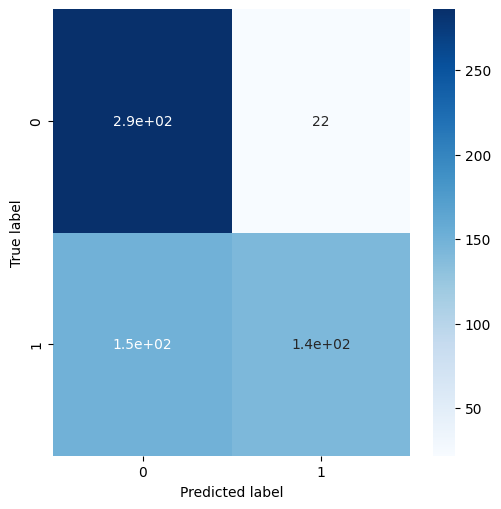

Fold 2:
last accuracy of Training : 99.50%
600/600 [==============================] - 1s 2ms/step
test accuracy : 72.50%
Accuracy: 0.725000
Only number of true prediction: 435
Precision: 0.725000
Recall: 0.725000
F1 score: 0.725000
Cohens kappa: 0.449339
ROC AUC: 0.791996
FP: [66 99]
FN: [99 66]
TP: [198 237]
TN: [237 198]
scores for each class:
TPR: [0.66666667 0.78217822]
TNR: [0.78217822 0.66666667]
PPV: [0.75       0.70535714]
NPV: [0.70535714 0.75      ]
FPR: [0.21782178 0.33333333]
FNR: [0.33333333 0.21782178]
FDR: [0.25       0.29464286]
Accuracy for each class: [0.725 0.725]
600/600 [==============================] - 1s 2ms/step


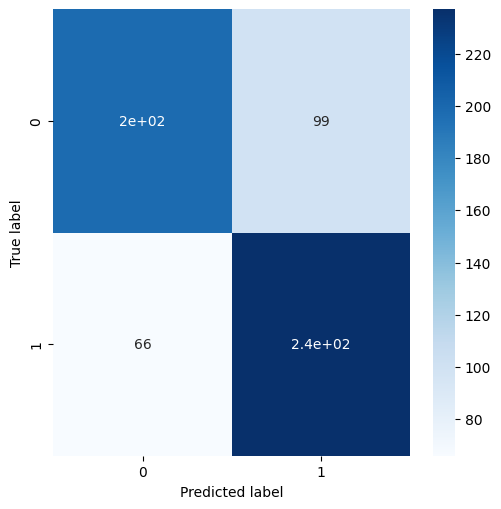

Fold 3:
last accuracy of Training : 99.50%
600/600 [==============================] - 1s 2ms/step
test accuracy : 71.17%
Accuracy: 0.711667
Only number of true prediction: 427
Precision: 0.711667
Recall: 0.711667
F1 score: 0.711667
Cohens kappa: 0.422178
ROC AUC: 0.793590
FP: [88 85]
FN: [85 88]
TP: [200 227]
TN: [227 200]
scores for each class:
TPR: [0.70175439 0.72063492]
TNR: [0.72063492 0.70175439]
PPV: [0.69444444 0.7275641 ]
NPV: [0.7275641  0.69444444]
FPR: [0.27936508 0.29824561]
FNR: [0.29824561 0.27936508]
FDR: [0.30555556 0.2724359 ]
Accuracy for each class: [0.71166667 0.71166667]
600/600 [==============================] - 1s 2ms/step


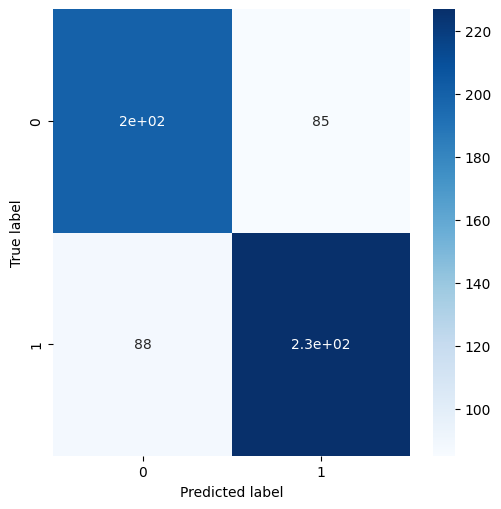

Fold 4:
last accuracy of Training : 100.00%
600/600 [==============================] - 1s 2ms/step
test accuracy : 76.17%
Accuracy: 0.761667
Only number of true prediction: 457
Precision: 0.761667
Recall: 0.761667
F1 score: 0.761667
Cohens kappa: 0.524601
ROC AUC: 0.837872
FP: [56 87]
FN: [87 56]
TP: [229 228]
TN: [228 229]
scores for each class:
TPR: [0.72468354 0.8028169 ]
TNR: [0.8028169  0.72468354]
PPV: [0.80350877 0.72380952]
NPV: [0.72380952 0.80350877]
FPR: [0.1971831  0.27531646]
FNR: [0.27531646 0.1971831 ]
FDR: [0.19649123 0.27619048]
Accuracy for each class: [0.76166667 0.76166667]
600/600 [==============================] - 2s 3ms/step


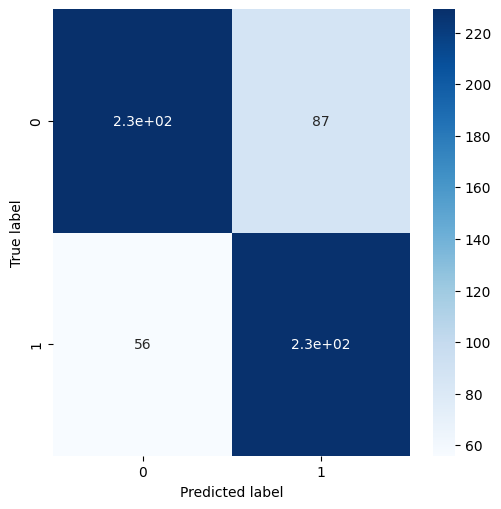

Fold 5:
last accuracy of Training : 100.00%
600/600 [==============================] - 1s 2ms/step
test accuracy : 74.33%
Accuracy: 0.743333
Only number of true prediction: 446
Precision: 0.743333
Recall: 0.743333
F1 score: 0.743333
Cohens kappa: 0.486324
ROC AUC: 0.823946
FP: [75 79]
FN: [79 75]
TP: [215 231]
TN: [231 215]
scores for each class:
TPR: [0.73129252 0.75490196]
TNR: [0.75490196 0.73129252]
PPV: [0.74137931 0.74516129]
NPV: [0.74516129 0.74137931]
FPR: [0.24509804 0.26870748]
FNR: [0.26870748 0.24509804]
FDR: [0.25862069 0.25483871]
Accuracy for each class: [0.74333333 0.74333333]
600/600 [==============================] - 1s 2ms/step


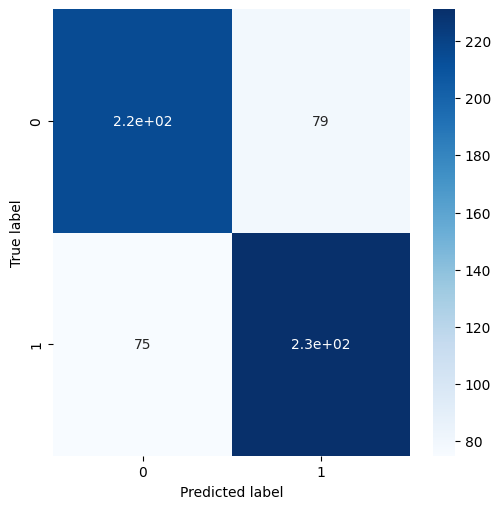

 Mean accuracy of test K FOLD :  73.10000000000001


In [ ]:
## Block 12
from sklearn.model_selection import KFold

# Create the k-folds cross-validator
num_folds = 5
kfold = KFold(n_splits = num_folds , shuffle = False)
print('kfold:' , kfold)
#############
#######
num_epochs = 30
train_acc = []
test_acc = []

train_loss = []
test_loss = []

fold_index = 1
SUM = 0
# Train model for each fold
for train, test in kfold.split(x_train_kfold, y_train_kfold):

    Y_train = y_train_kfold[train]
    X_train = x_train_kfold[train]
    Y_valid = y_train_kfold[test]
    X_valid = x_train_kfold[test]

    model = getmodel()

    history = model.fit(X_train, Y_train,
              batch_size= 20 ,
              epochs= num_epochs,
              verbose=0,
              validation_data=(X_valid, Y_valid))

    # Preserve the history and print out some basic stats
    train_acc.append(history.history['acc'])
    test_acc.append(history.history['val_acc'])
    ###
    train_loss.append(history.history['loss'])
    test_loss.append(history.history['val_loss'])
    ###
    print("Fold %d:" % fold_index)
    print("last accuracy of Training : %.2f%%" % (history.history['acc'][-1]*100))
    # print("accuracy of validation : %.2f%%" % (history.history['val_acc'][-1]*100))

    X_validd = X_valid
    Y_validd = Y_valid

    probs       = model.predict(X_validd, batch_size=1)
    threshold_output = np.where(probs > 0.5, 1, 0)
    acc         = np.mean(threshold_output == Y_validd)
    print("test accuracy : %.2f%%" % (acc*100))
    SUM = SUM + acc
    fold_index += 1

    ##############################################
    yhat_probs = model.predict(X_validd, verbose=0)
    yhat_classes = np.where(yhat_probs > 0.5, 1, 0)

    ### Accuracy
    accuracy = accuracy_score(Y_validd, yhat_classes)
    print('Accuracy: %f' % accuracy)

    ### Normalized Accuracy
    accuracy = accuracy_score(Y_validd, yhat_classes , normalize=False)
    print('Only number of true prediction:',accuracy)

    ### precision tp / (tp + fp)
    precision = precision_score(Y_validd, yhat_classes,average='micro')
    print('Precision: %f' % precision)

    ### recall: tp / (tp + fn)
    recall = recall_score(Y_validd, yhat_classes,average='micro')
    print('Recall: %f' % recall)

    ### f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(Y_validd, yhat_classes , average='micro')
    print('F1 score: %f' % f1)

    ### kappa
    kappa = cohen_kappa_score(Y_validd, yhat_classes)
    print('Cohens kappa: %f' % kappa)

    ### ROC AUC
    auc = roc_auc_score(Y_validd, yhat_probs, average='micro')
    print('ROC AUC: %f' % auc)

    ###############
    ######
    print('============================')
    import numpy as np
    from sklearn.metrics import confusion_matrix
    yhat_probs = model.predict(X_validd, verbose=0)
    yhat_classes = np.where(yhat_probs > 0.5, 1, 0)

    cnf_matrix = confusion_matrix(Y_validd, yhat_classes)

    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    print('FP:' , FP)

    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    print('FN:' , FN)

    TP = np.diag(cnf_matrix)
    print('TP:', TP)

    TN = cnf_matrix.sum() - (FP + FN + TP)
    print('TN:', TN)

    ######
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    print('scores for each class:')

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print('TPR:' ,TPR)

    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    print('TNR:' ,TNR)

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print('PPV:' ,PPV)

    # Negative predictive value
    NPV = TN/(TN+FN)
    print('NPV:' ,NPV)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print('FPR:' ,FPR)

    # False negative rate
    FNR = FN/(TP+FN)
    print('FNR:' ,FNR)

    # False discovery rate
    FDR = FP/(TP+FP)
    print('FDR:' ,FDR)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('Accuracy for each class:' , ACC)

    ######
    print('============================')
    #### confusion matrix
    # simple confusion matrix
    from sklearn.metrics import confusion_matrix
    probs       = model.predict(X_validd,batch_size=1)
    preds = np.where(probs > 0.5, 1, 0)
    confusion_matrix(Y_validd, preds)

    # beautiful confusion matrix
    # !pip install -q tensorflow-gpu==2.0.0-beta1
    from tensorflow.keras import datasets, layers, models
    import matplotlib.pyplot as plt
    import tensorflow as tf
    import numpy as np
    import seaborn as sns
    import pandas as pd
    tf.__version__
    classes=[0,1]
    y_pred = model.predict(X_validd, verbose=0)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    matrix = confusion_matrix(Y_validd, y_pred)

    con_mat_df = pd.DataFrame(matrix,index = classes, columns = classes)
    figure = plt.figure(figsize=(5,5))
    sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#########################
############
SUM = SUM / 5
SUM = SUM * 100
print(' Mean accuracy of test K FOLD : ' , SUM )